Importing the libraries


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Loading the Dataset

In [ ]:
data = pd.read_csv('/content/housing.csv')

In [ ]:
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [ ]:
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [ ]:
data.isnull().sum()

,0
longitude,0
latitude,0
housing_median_age,0
total_rooms,0
total_bedrooms,207
population,0
households,0
median_income,0
median_house_value,0
ocean_proximity,0


In [ ]:
data.shape

(20640, 10)

In [ ]:
data = data.dropna()

In [ ]:
data.shape

(20433, 10)

In [ ]:
data.isnull().sum()

,0
longitude,0
latitude,0
housing_median_age,0
total_rooms,0
total_bedrooms,0
population,0
households,0
median_income,0
median_house_value,0
ocean_proximity,0


Splitting training and testing data

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X = data.drop('median_house_value', axis=1)
Y = data['median_house_value']

# Convert categorical text into numeric using one-hot encoding
# One-Hot Encode the 'ocean_proximity' column
X = pd.get_dummies(X)

In [ ]:
X

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,False,False,False,True,False
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,False,False,False,True,False
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,False,False,False,True,False
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,False,False,False,True,False
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,False,True,False,False,False
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,False,True,False,False,False
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,False,True,False,False,False
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,False,True,False,False,False


In [ ]:
Y

,median_house_value
0,452600.0
1,358500.0
2,352100.0
3,341300.0
4,342200.0
...,...
20635,78100.0
20636,77100.0
20637,92300.0
20638,84700.0


In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2)

In [ ]:
train_data = X_train.join(Y_train)

In [ ]:
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN,median_house_value
3800,-118.36,34.16,42.0,2304.0,442.0,862.0,429.0,4.3542,True,False,False,False,False,417900.0
4593,-118.27,34.05,26.0,1164.0,674.0,1685.0,541.0,1.5727,True,False,False,False,False,225000.0
8278,-118.16,33.78,29.0,3684.0,1301.0,3891.0,1143.0,1.6955,False,False,False,False,True,179700.0
5629,-118.30,33.77,18.0,3821.0,795.0,2831.0,769.0,2.9571,True,False,False,False,False,346200.0
431,-122.29,37.88,52.0,2159.0,424.0,824.0,388.0,3.8897,False,False,False,True,False,218400.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6318,-117.97,34.01,33.0,2006.0,381.0,1410.0,346.0,3.7083,True,False,False,False,False,165500.0
3088,-118.23,35.48,17.0,2354.0,514.0,775.0,380.0,1.8369,False,True,False,False,False,59400.0
9787,-120.79,36.06,29.0,1916.0,386.0,1019.0,314.0,2.4881,True,False,False,False,False,87500.0
10907,-117.85,33.75,27.0,2311.0,632.0,2936.0,609.0,2.5651,True,False,False,False,False,171400.0


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

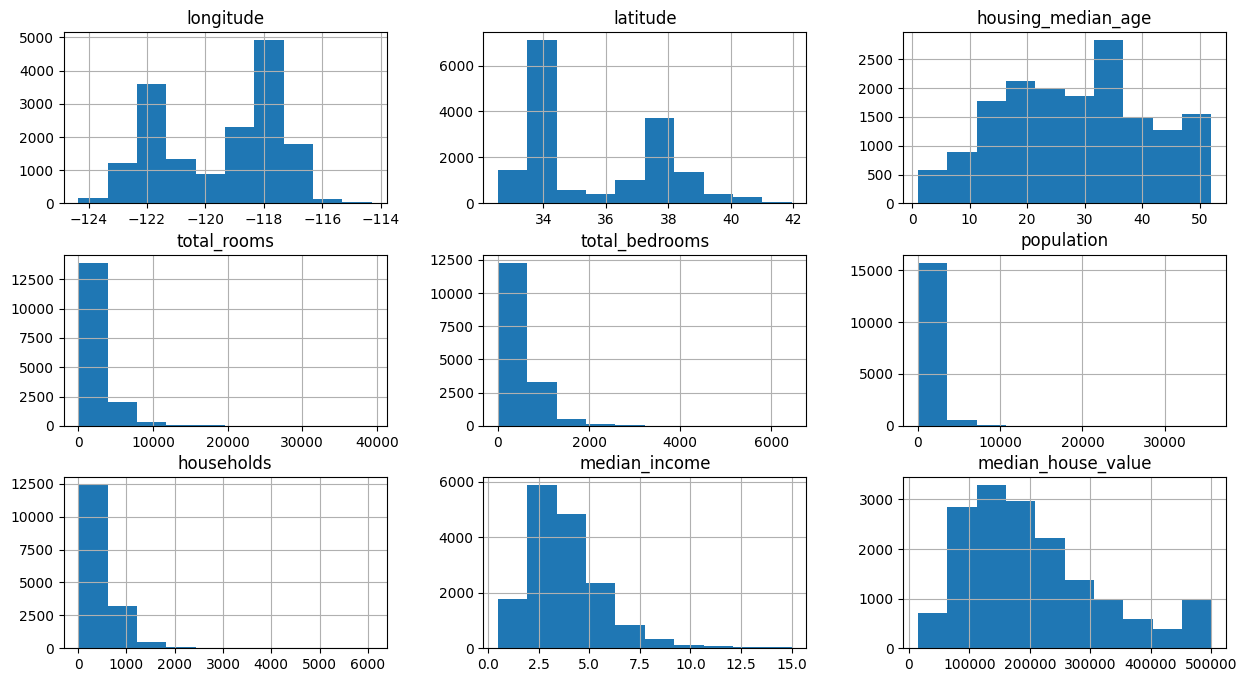

In [ ]:
train_data.hist(figsize = (15, 8))

In [ ]:
train_data.select_dtypes(include='number').corr()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.923512,-0.113463,0.049607,0.073851,0.101729,0.059637,-0.011376,-0.045404
latitude,-0.923512,1.000000,0.014584,-0.042122,-0.072645,-0.112302,-0.077117,-0.084598,-0.146625
housing_median_age,-0.113463,0.014584,1.000000,-0.359010,-0.318194,-0.290527,-0.299893,-0.118721,0.103319
total_rooms,0.049607,-0.042122,-0.359010,1.000000,0.930993,0.858490,0.918696,0.201351,0.137640
total_bedrooms,0.073851,-0.072645,-0.318194,0.930993,1.000000,0.877526,0.979424,-0.003796,0.054958
population,0.101729,-0.112302,-0.290527,0.858490,0.877526,1.000000,0.907541,0.008590,-0.018658
households,0.059637,-0.077117,-0.299893,0.918696,0.979424,0.907541,1.000000,0.016831,0.070145
median_income,-0.011376,-0.084598,-0.118721,0.201351,-0.003796,0.008590,0.016831,1.000000,0.691767
median_house_value,-0.045404,-0.146625,0.103319,0.137640,0.054958,-0.018658,0.070145,0.691767,1.000000


<Axes: >

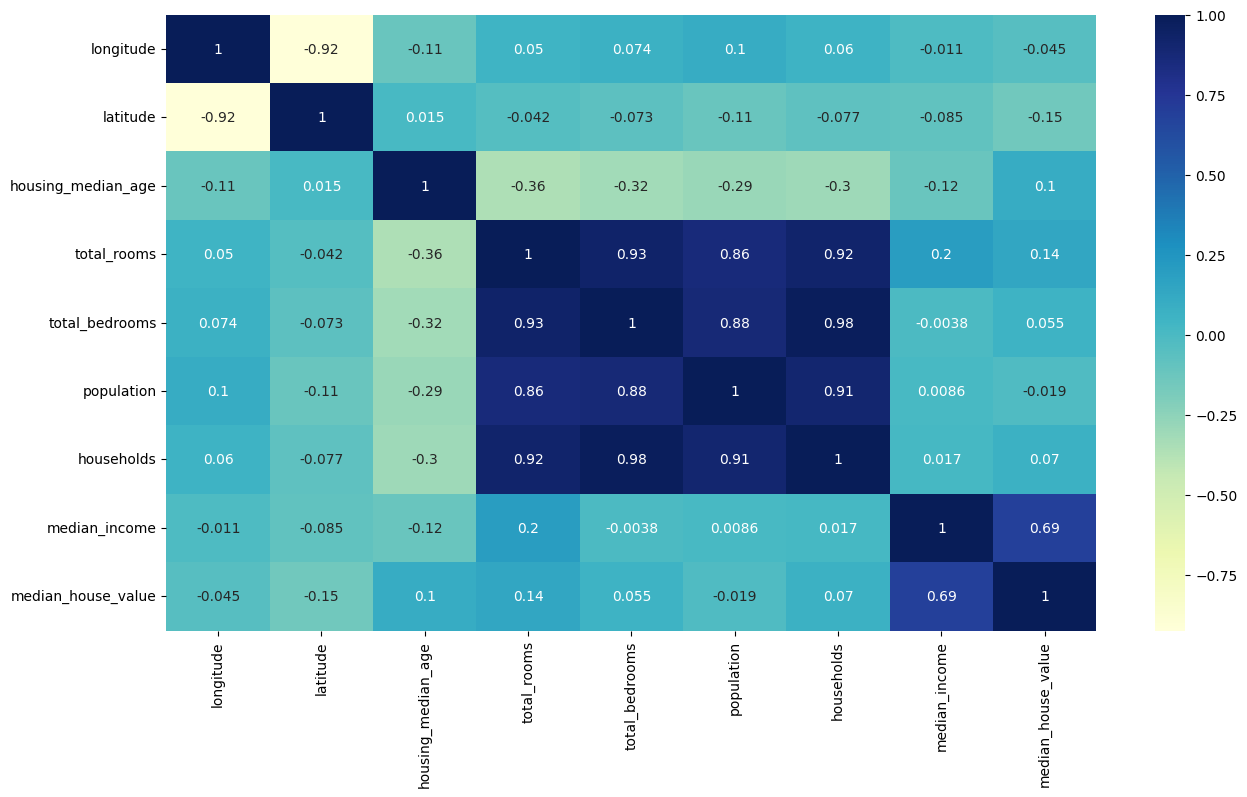

In [ ]:
plt.figure(figsize=(15, 8))
sns.heatmap(train_data.select_dtypes(include='number').corr(), annot=True, cmap='YlGnBu')


I will use linear Regression now

Train the Model

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
model = LinearRegression()
model.fit(X_train, Y_train)

LinearRegression()

Make predictions

In [ ]:
Y_pred = model.predict(X_test)

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

Evaluating the Model

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)

print("Mean Squared Error:", mse)
print("R² Score:", r2)

Mean Squared Error: 5016799486.295643
R² Score: 0.6283303805339451


Visualize Predictions vs Actual Values

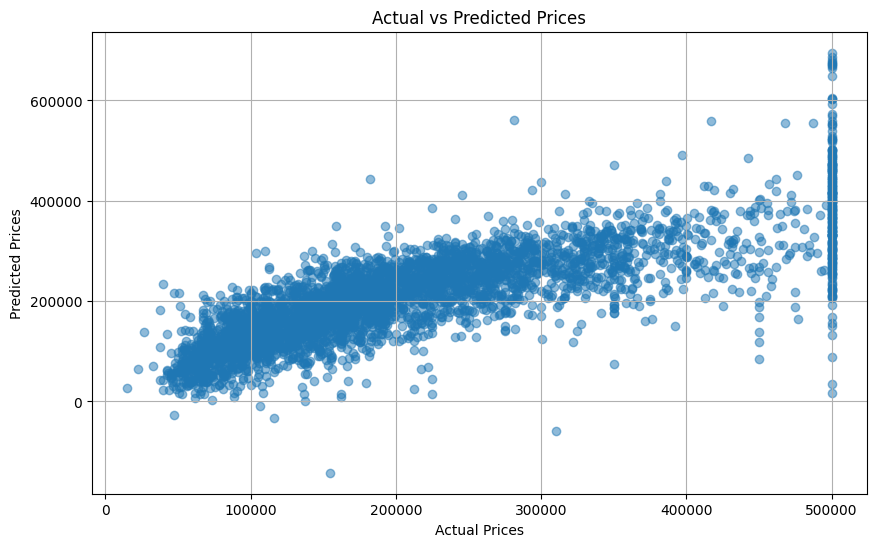

In [ ]:
plt.figure(figsize=(10,6))
plt.scatter(Y_test, Y_pred, alpha=0.5)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted Prices")
plt.grid(True)
plt.show()

In [ ]:
input_data = {
    'longitude': -122.0,
    'latitude': 37.0,
    'housing_median_age': 30,
    'total_rooms': 2000,
    'total_bedrooms': 400,
    'population': 1000,
    'households': 300,
    'median_income': 5.0,
    'ocean_proximity': '<1H OCEAN'
}

input_df = pd.DataFrame([input_data])
input_df_encoded = pd.get_dummies(input_df)
input_df_encoded = input_df_encoded.reindex(columns=X.columns, fill_value=0)

predicted_price = model.predict(input_df_encoded)
print("Predicted House Price:", predicted_price[0])

Predicted House Price: 291580.08394317515
